# We're Trending Clustering

### __1. INDUSTRY__ 

__Entertainment__ industry is assigned.

### __2. DATA SETS__

__2.1. SOURCE__: The dataset is from [Kaggle](https://www.kaggle.com/datasets).

__DESCRIPTION__: The dataset contains about one hundred thousand data with attributes related to youtube trending videos. The following attributes from the dataset will be used for analysis.

|Attribute       | Datatype     |
| :------------- | ----------: |
| video_id | object   |
| title   | object |
|publishedAt| object|
|channelId| object|
|channelTitle | object|
|categoryId|int64|
|trending_date|object|
|tags|object|
|view_count|int64|
|likes|int64|
|dislikes|int64|
|comment_count|int64|
|thumbnail_link|object|
|description|object|
|category_name|object||

### __3. IDEAS__

__3.1.__ To cluster trending videos based on category id, percent like, percent dislike, percent comment using kmeans clustering.

__3.2.__ To cluster trending videos based on tag count, percent like, percent dislike, percent comment using dbscan. 

### __4. LOADING THE DATASETS__

__Load the libraries__

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Import the csv file of dataset__

In [2]:
youtube_data=pd.read_csv("/Users/madhumithrasubramaniankarthikesh/Downloads/US_youtube_trending_data_10_21_20.csv")
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


### __5. DATA PREPARATION__

__5.1 DATA CLEANING__

__Drop the NaN rows__

In [3]:
youtube_data=youtube_data.dropna()
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


__Reset the index and drop the old index column__

In [4]:
youtube_data=youtube_data.reset_index()
del youtube_data['index']
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


__Printing the dimension of the dataset__

In [5]:
print(youtube_data.shape)

(14130, 16)


__Mapping categories__

In [6]:
youtube_data.loc[(youtube_data['categoryId'] == 1),  "category_name"] = 'Film and Animation'
youtube_data.loc[(youtube_data['categoryId'] == 2),  "category_name"] = 'Cars and Vehicles'
youtube_data.loc[(youtube_data['categoryId'] == 10), "category_name"] = 'Music'
youtube_data.loc[(youtube_data['categoryId'] == 15), "category_name"] = 'Pet and Animals'
youtube_data.loc[(youtube_data['categoryId'] == 17), "category_name"] = 'Sports'
youtube_data.loc[(youtube_data['categoryId'] == 19), "category_name"] = 'Travel and Events'
youtube_data.loc[(youtube_data['categoryId'] == 20), "category_name"] = 'Gaming'
youtube_data.loc[(youtube_data['categoryId'] == 22), "category_name"] = 'People and Blogs'
youtube_data.loc[(youtube_data['categoryId'] == 23), "category_name"] = 'Comedy'
youtube_data.loc[(youtube_data['categoryId'] == 24), "category_name"] = 'Entertainment'
youtube_data.loc[(youtube_data['categoryId'] == 25), "category_name"] = 'News and Politics'
youtube_data.loc[(youtube_data['categoryId'] == 26), "category_name"] = 'How to and Style'
youtube_data.loc[(youtube_data['categoryId'] == 27), "category_name"] = 'Education'
youtube_data.loc[(youtube_data['categoryId'] == 28), "category_name"] = 'Science and Technology'
youtube_data.loc[(youtube_data['categoryId'] == 29), "category_name"] = 'Nonprofits & Activism'
youtube_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People and Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,How to and Style


__Barplot for comments_disabled__

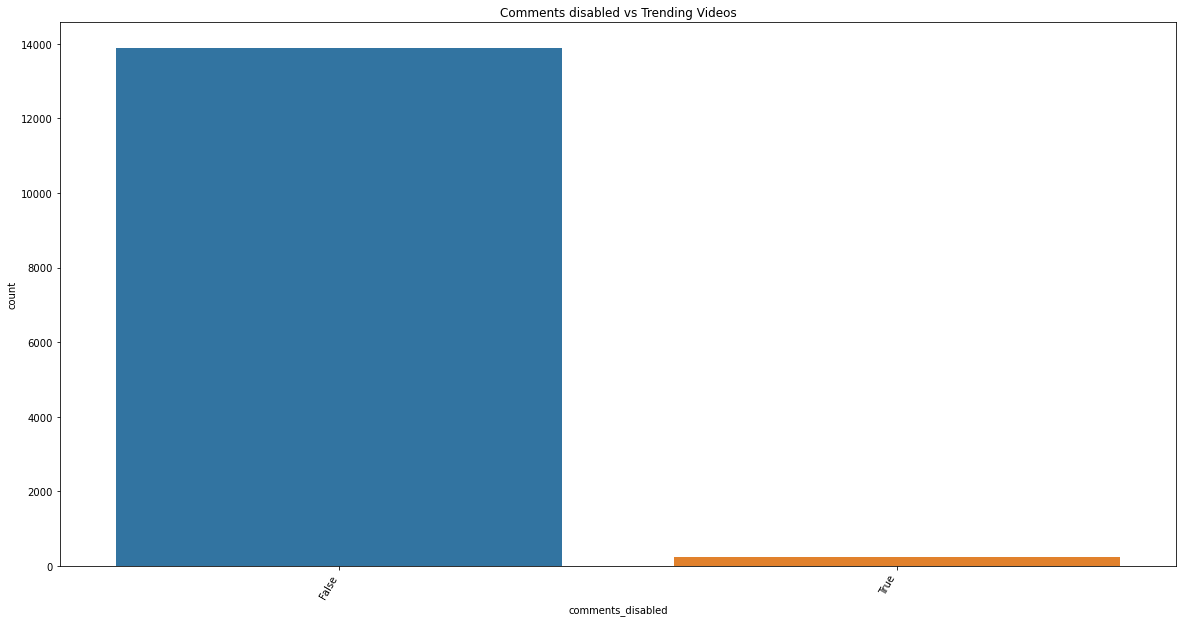

In [7]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='comments_disabled', data=youtube_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Comments disabled vs Trending Videos');

The comments are enabled for all videos except 1000.

__Barplot for ratings_disabled__

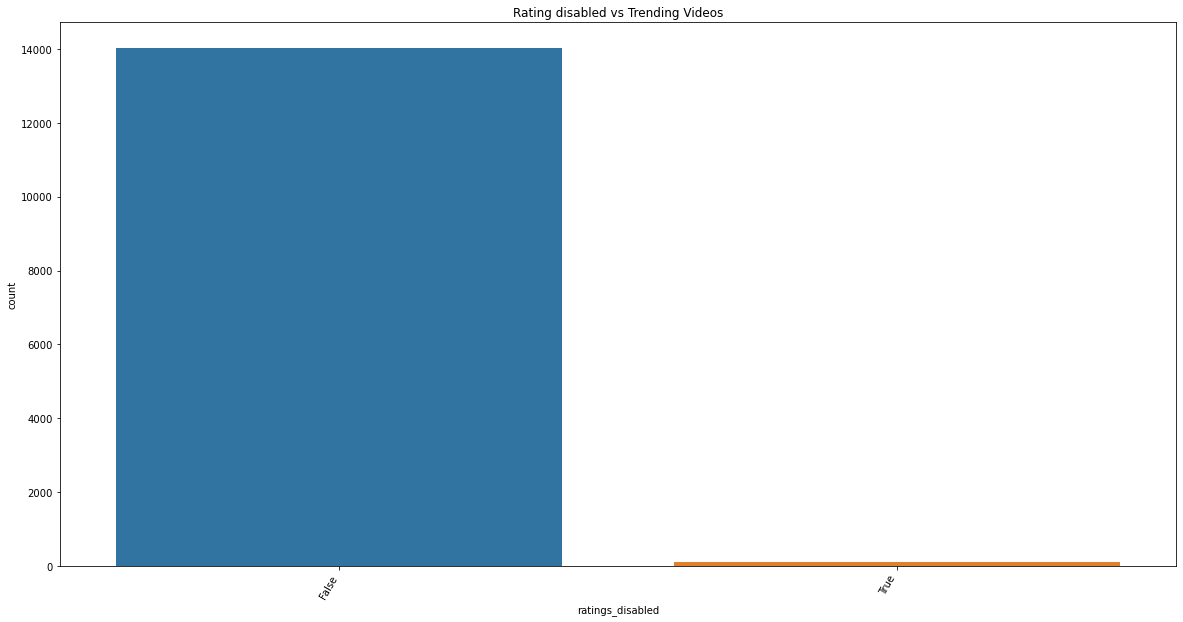

In [8]:
plt.figure(figsize=(20,10))
g = sns.countplot(x='ratings_disabled', data=youtube_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Rating disabled vs Trending Videos');

The ratings are enabled for all videos except few fundreds.

__Deleting the comments_disabled and ratings_disabled column__

In [9]:
del youtube_data['comments_disabled']
del youtube_data['ratings_disabled']
del youtube_data['thumbnail_link']
del youtube_data['description']
del youtube_data['title']
del youtube_data['video_id']
youtube_data.head()

,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,category_name
0,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People and Blogs
1,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming
2,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment
3,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music
4,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,How to and Style


__Printing the dimension of the dataset__

In [10]:
print(youtube_data.shape)

(14130, 11)


__5.2 FORMATTING__

__Attributes and datatypes of the dataset__

In [11]:
for column in youtube_data.columns:
    print(column, " is ", youtube_data[column].dtype.name)

publishedAt  is  object
channelId  is  object
channelTitle  is  object
categoryId  is  int64
trending_date  is  object
tags  is  object
view_count  is  int64
likes  is  int64
dislikes  is  int64
comment_count  is  int64
category_name  is  object


__5.3 VISUALIZATION__

__Barplot for Category vs Trending videos__

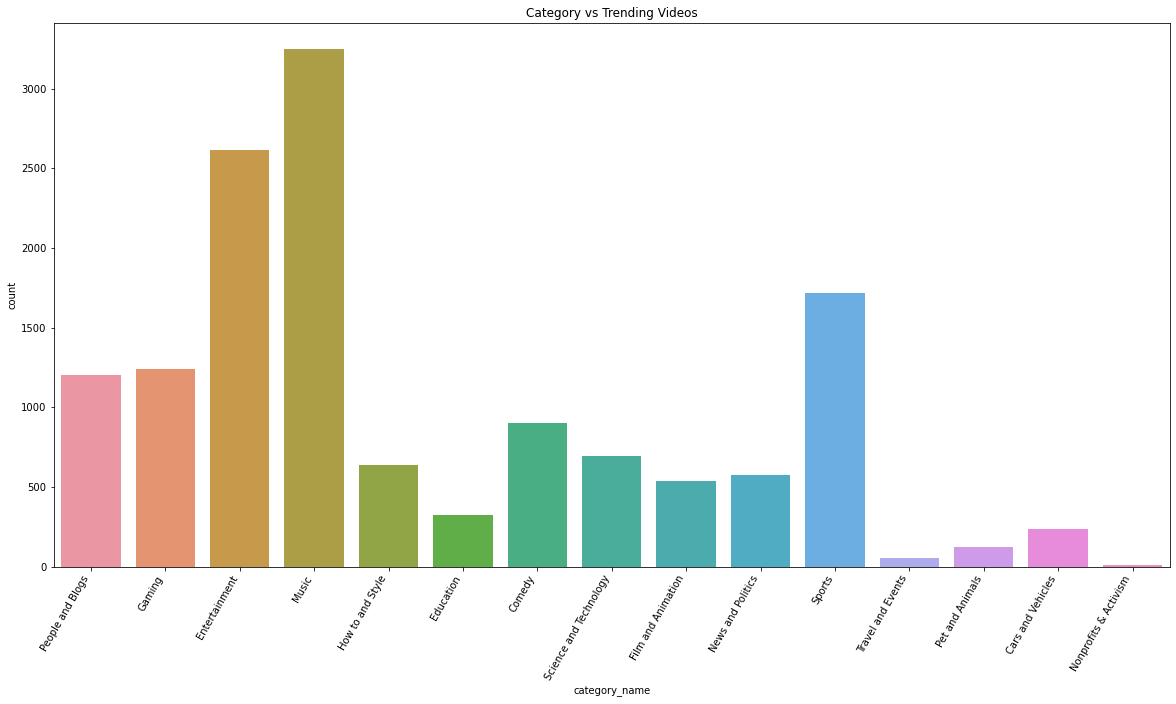

In [12]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=youtube_data['category_name'], data=youtube_data)
g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
g.set_title('Category vs Trending Videos');

Music and entertainment has large number of trending videos.

__Distribution plot for likes__

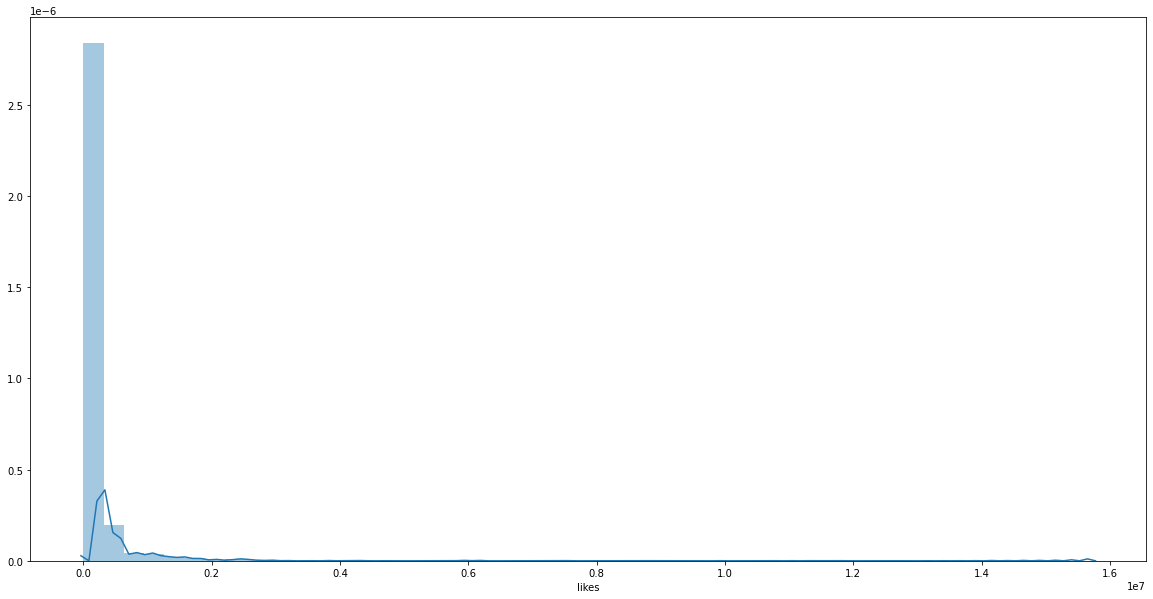

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['likes']) ;

__Distribution plot for view counts__

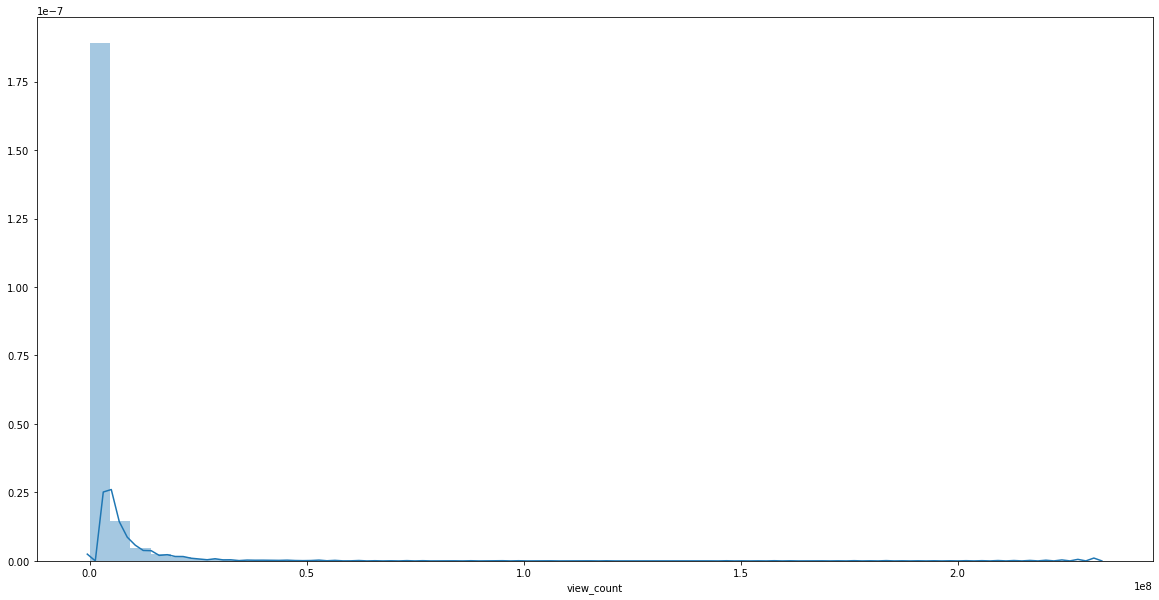

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['view_count']) ;

__Distribution plot for dislikes__

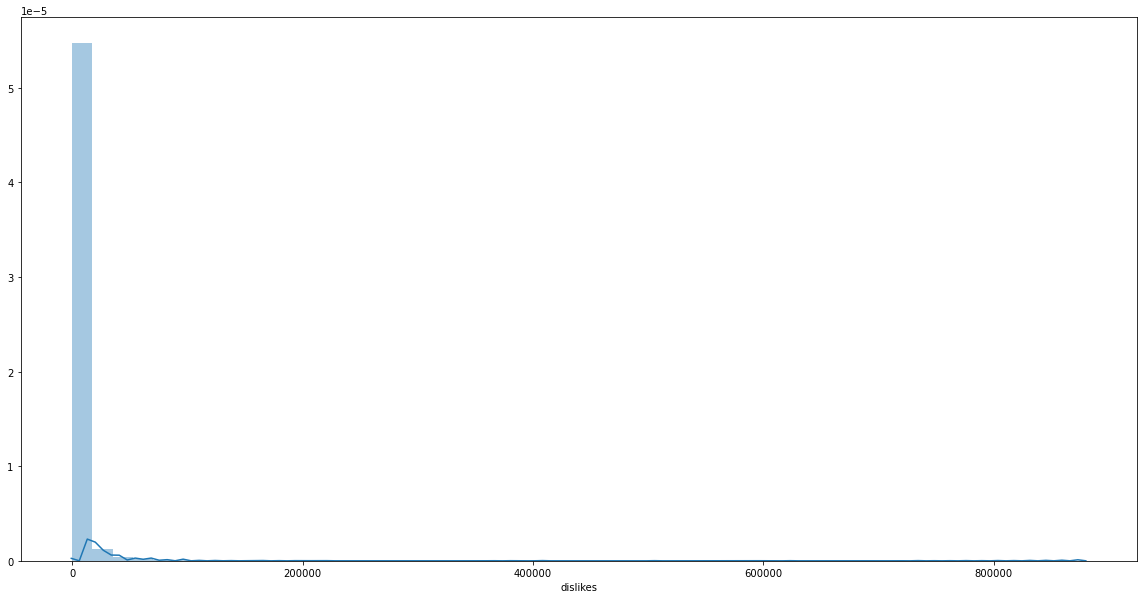

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['dislikes']) ;

__Distribution plot for comment count__

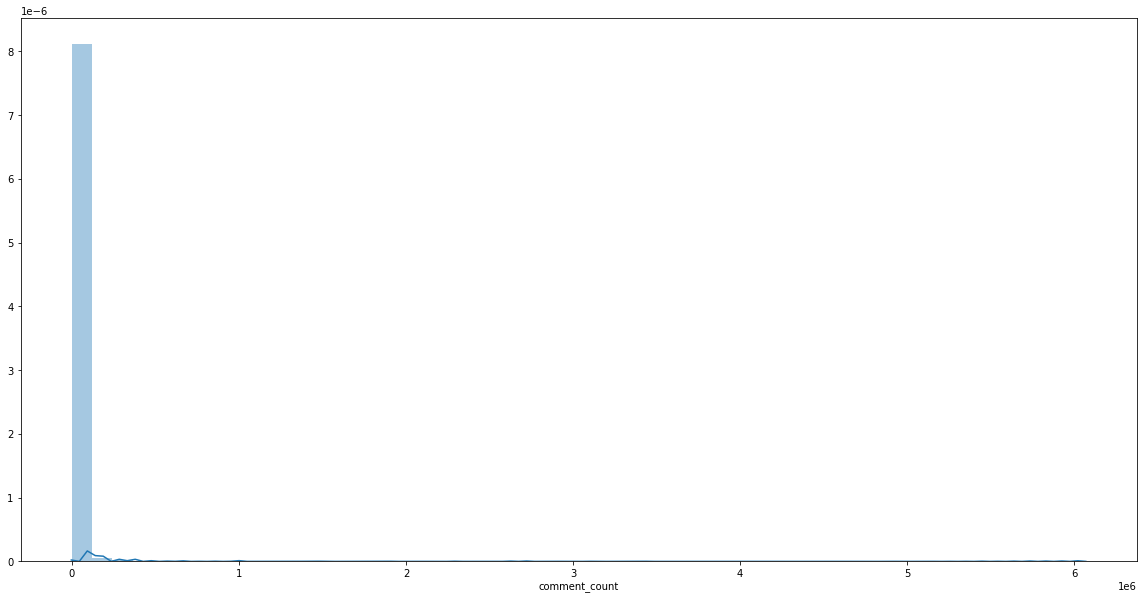

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['comment_count']) ;

__5.4 FEATURE ENGINEERING__

In [17]:
youtube_data['temp'] = youtube_data['tags'].str.replace('|',' ')
youtube_data.head()

,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,category_name,temp
0,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People and Blogs,brawadis prank basketball skits ghost funny vi...
1,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming,Apex Legends Apex Legends characters new Apex ...
2,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment,jacksepticeye funny funny meme memes jacksepti...
3,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music,xxl freshman xxl freshmen 2020 xxl freshman 20...
4,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,How to and Style,The LaBrant Family DIY Interior Design Makeove...


__Finding the three highly repeated tags of a category for trending videos__

,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,category_name,temp,Top Tags
0,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People and Blogs,brawadis prank basketball skits ghost funny vi...,"""damelio"" and the"
1,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming,Apex Legends Apex Legends characters new Apex ...,among us game
2,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment,jacksepticeye funny funny meme memes jacksepti...,the and trailer
3,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music,xxl freshman xxl freshmen 2020 xxl freshman 20...,music video the
4,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,How to and Style,The LaBrant Family DIY Interior Design Makeove...,to makeup how


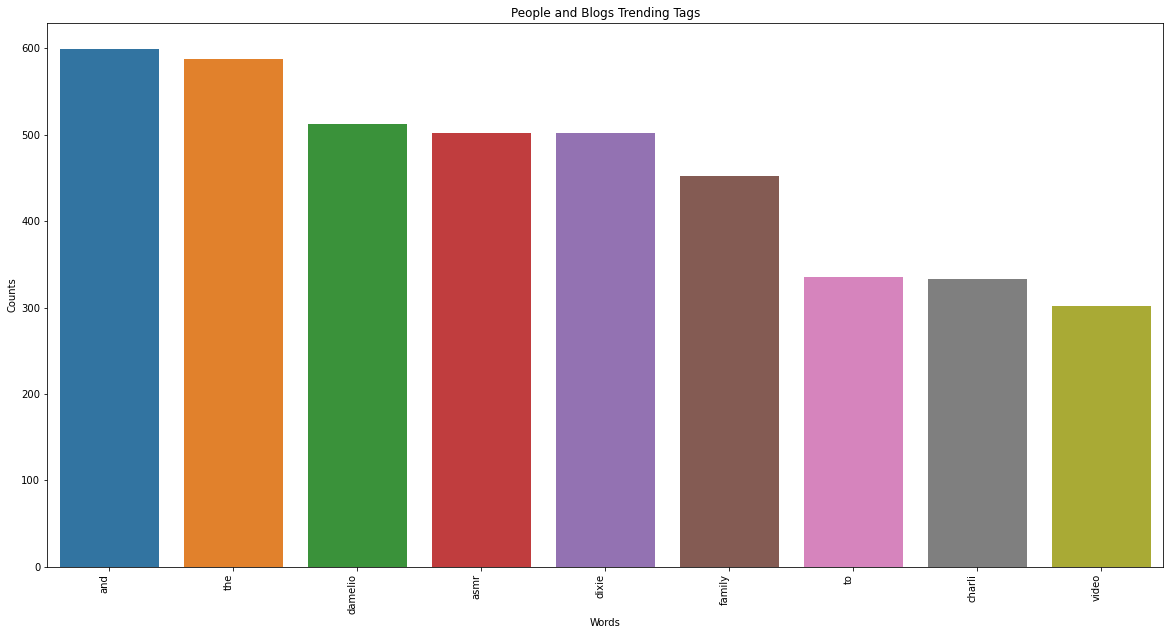

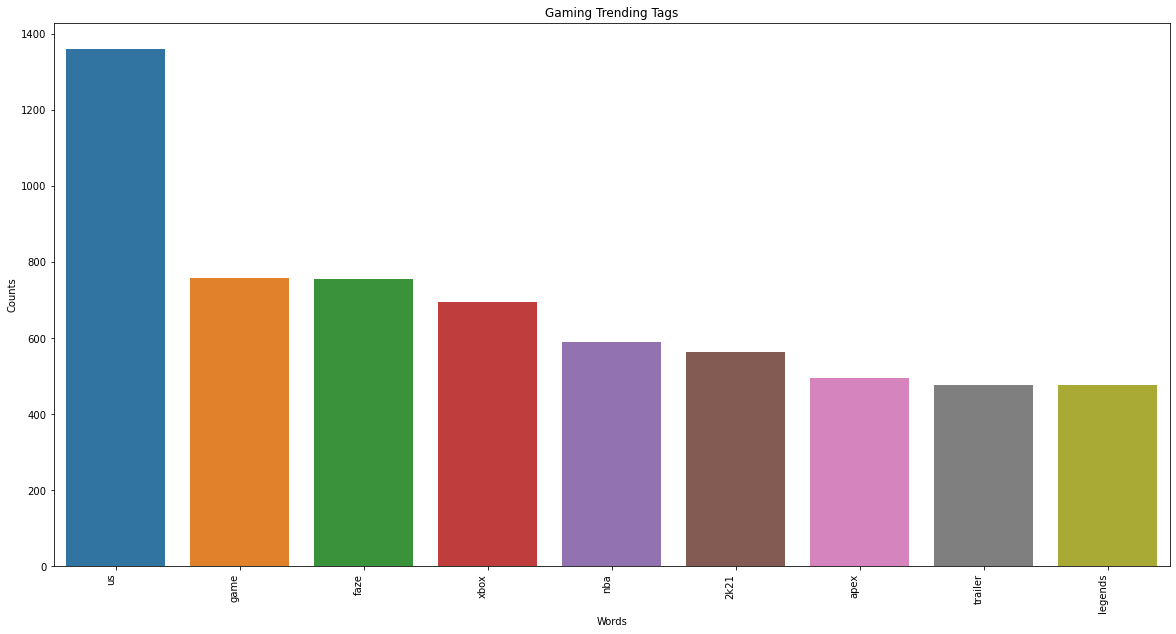

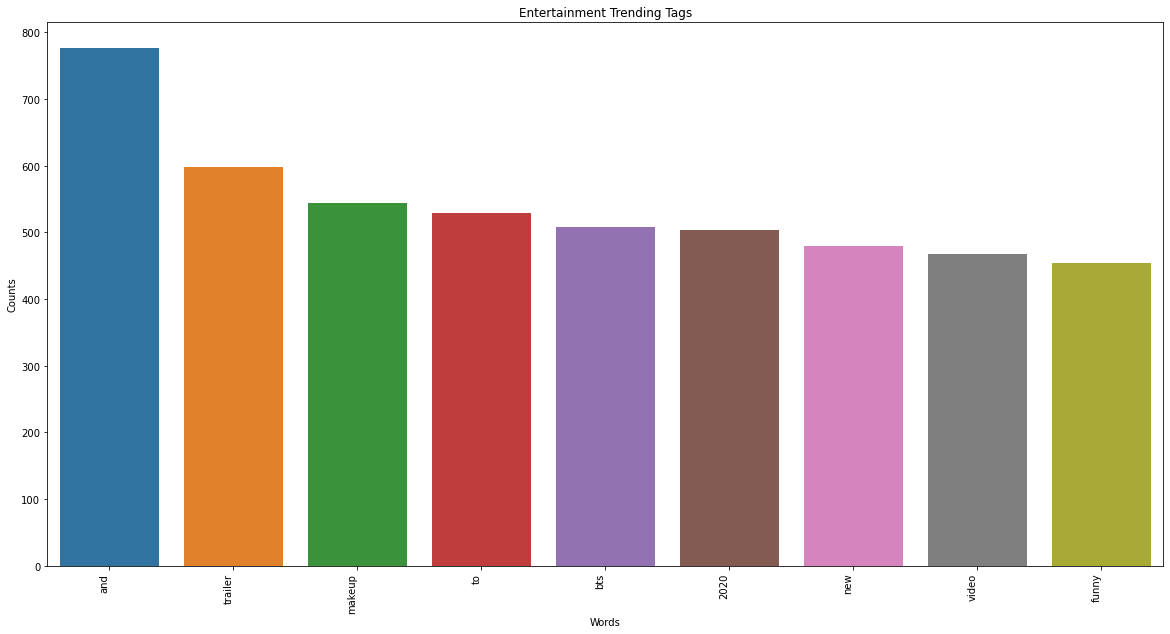

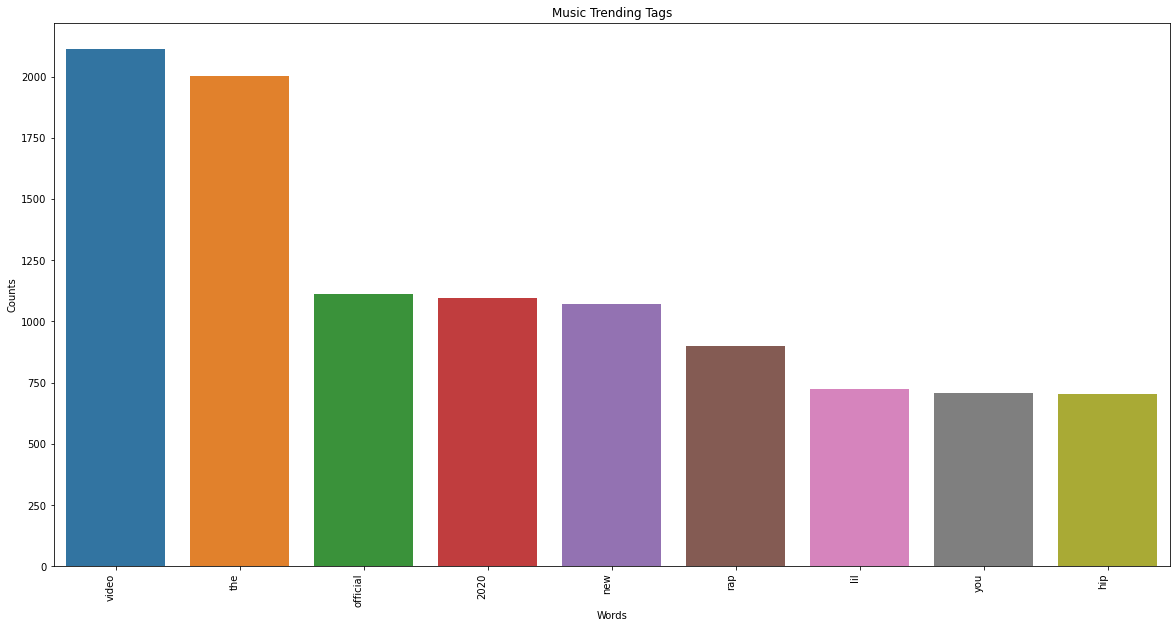

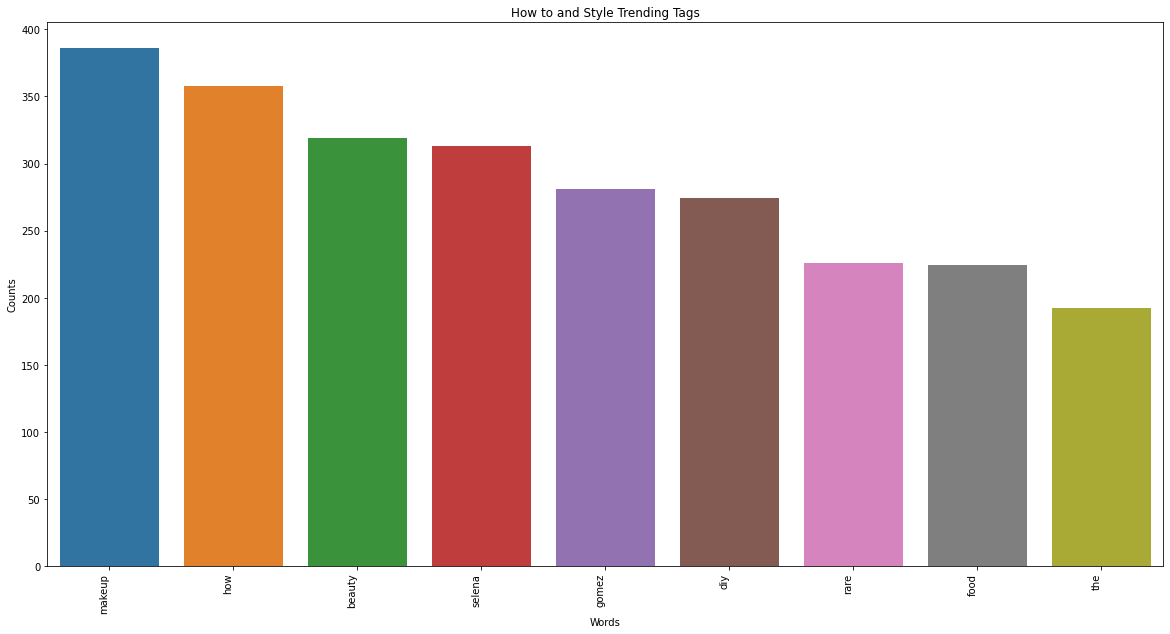

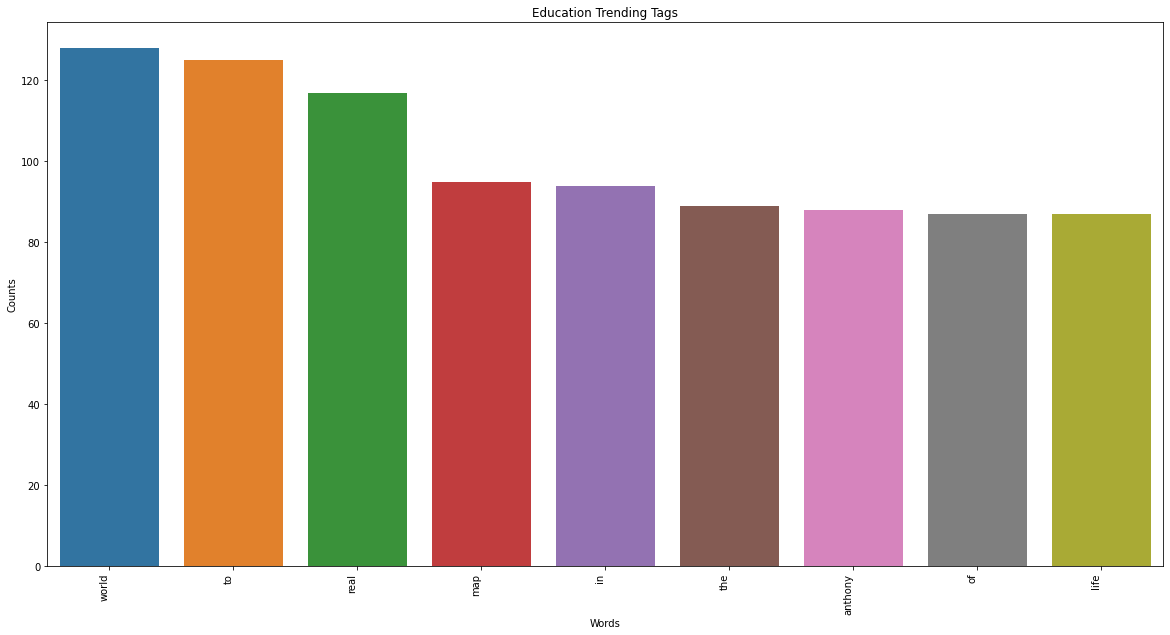

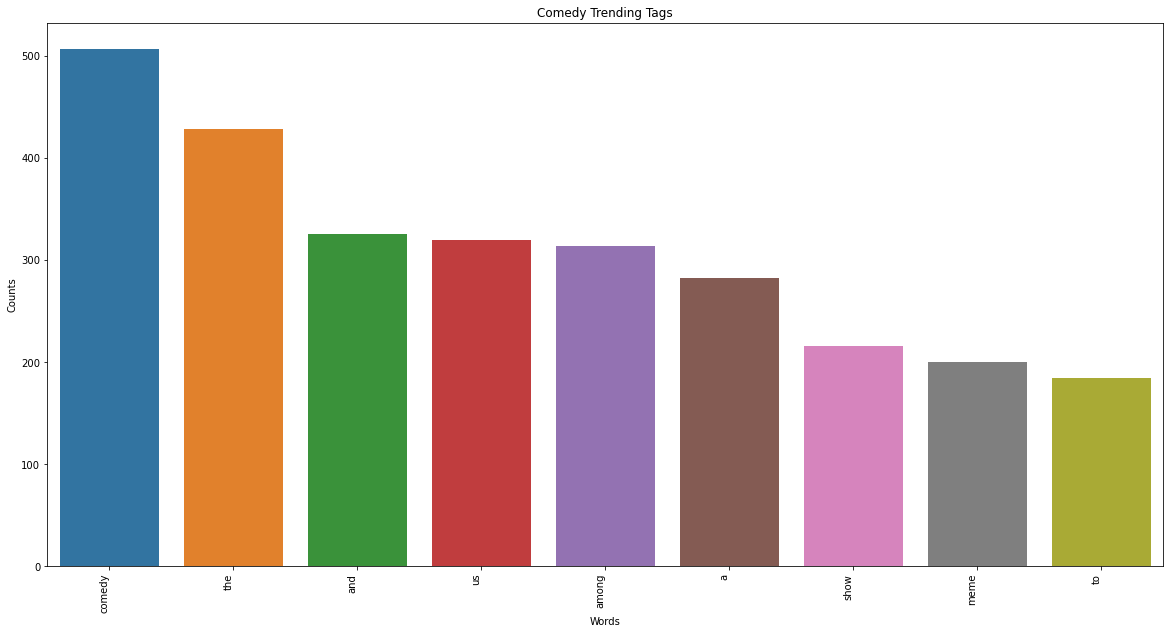

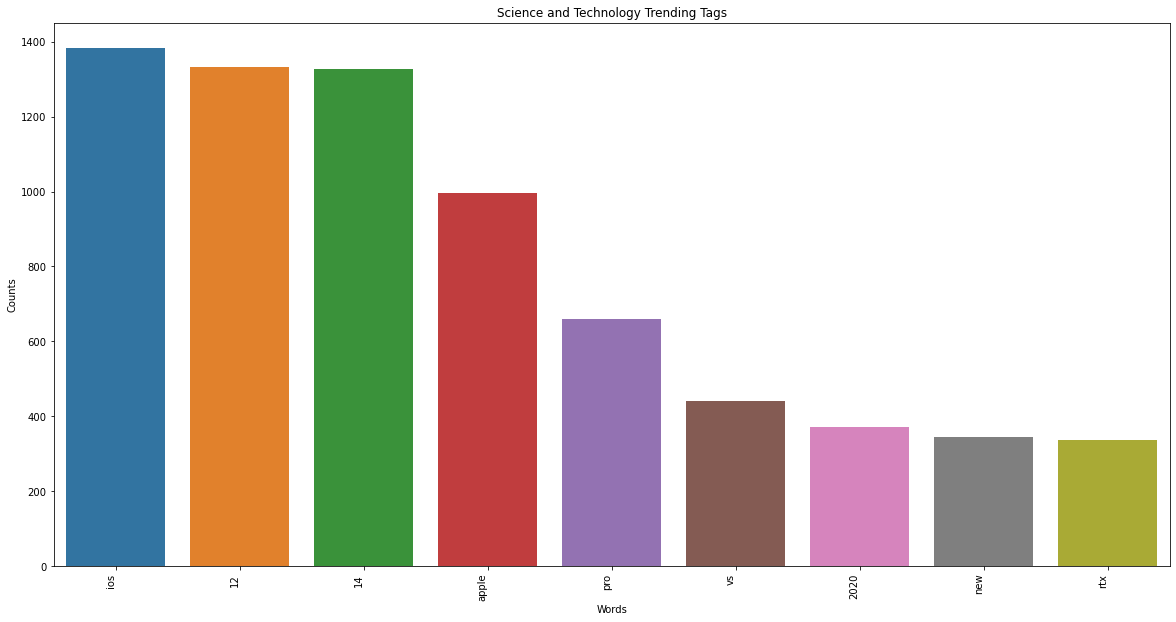

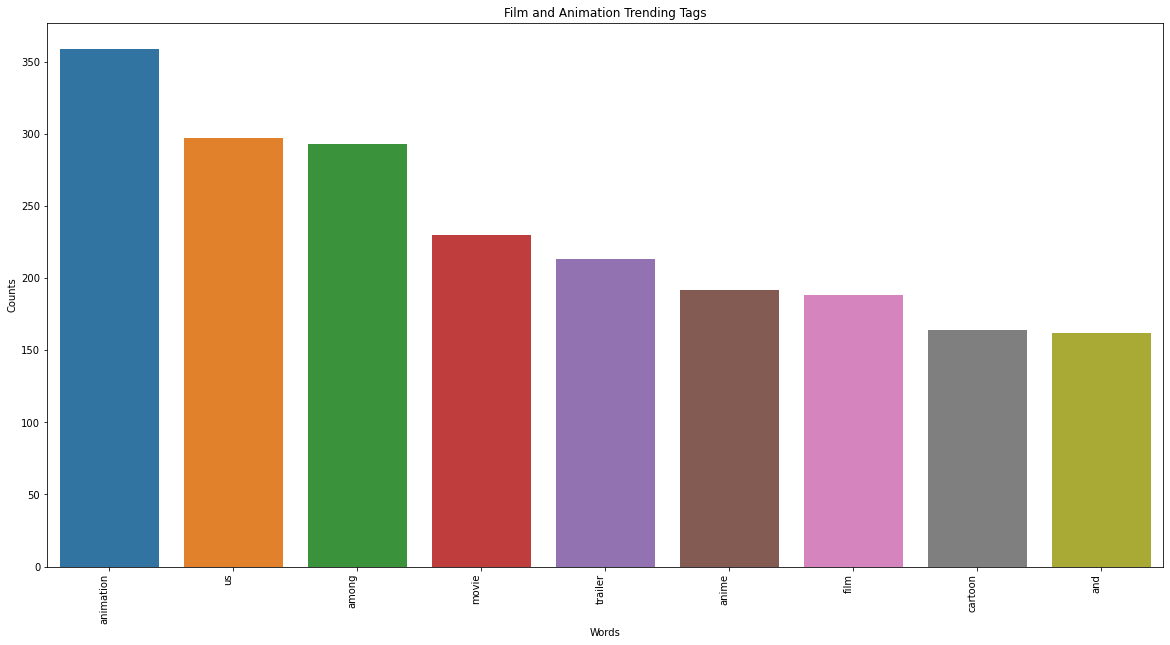

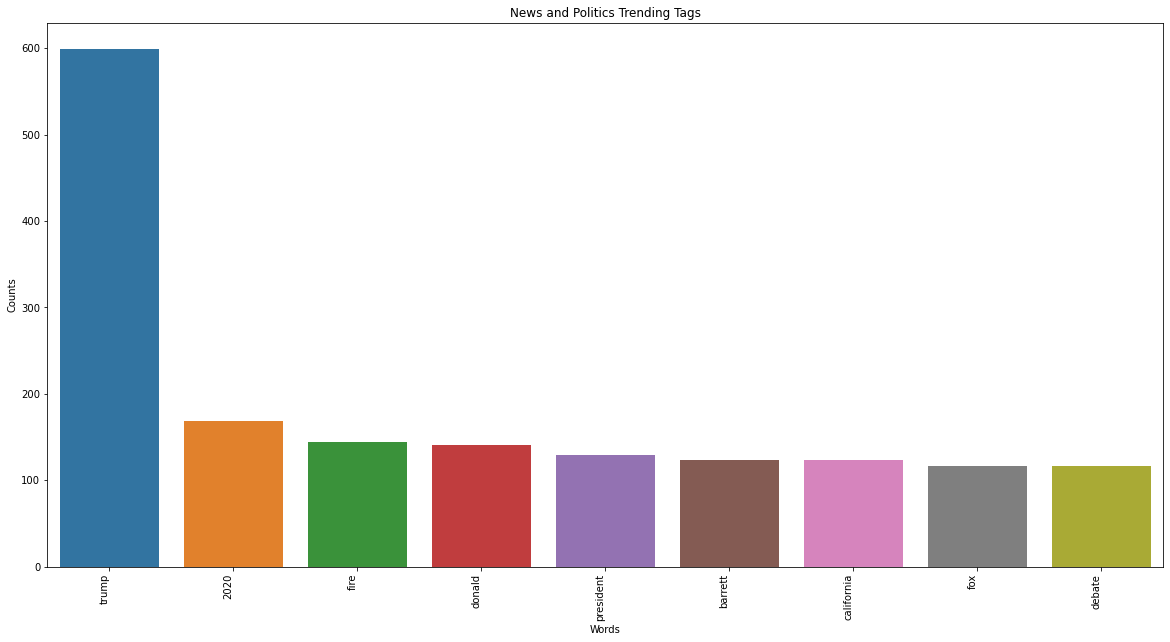

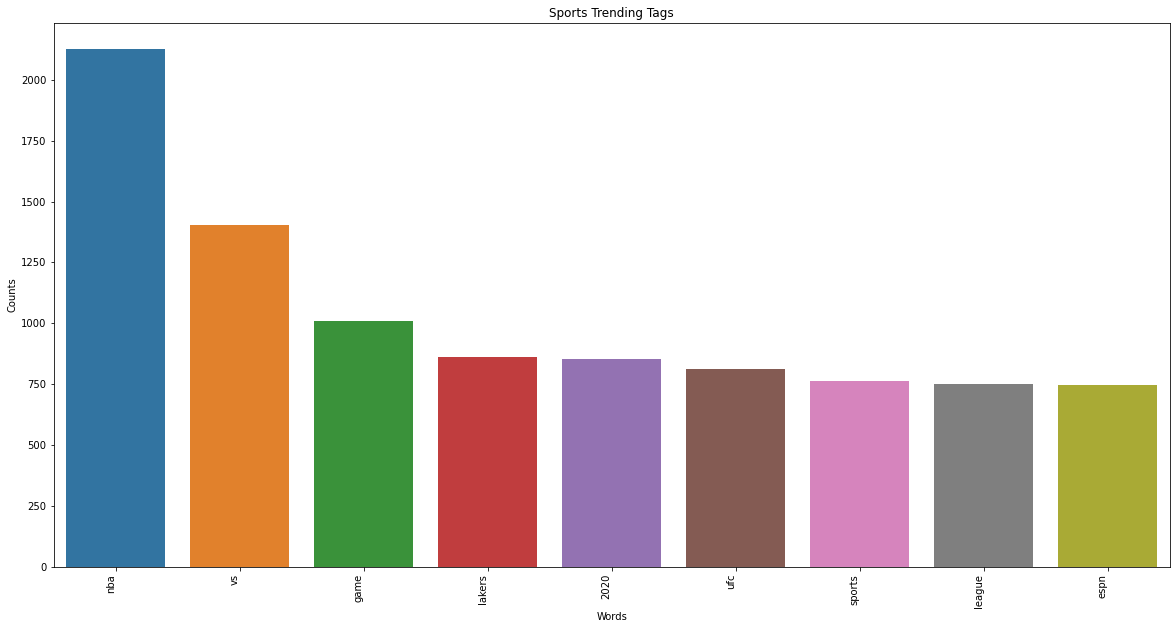

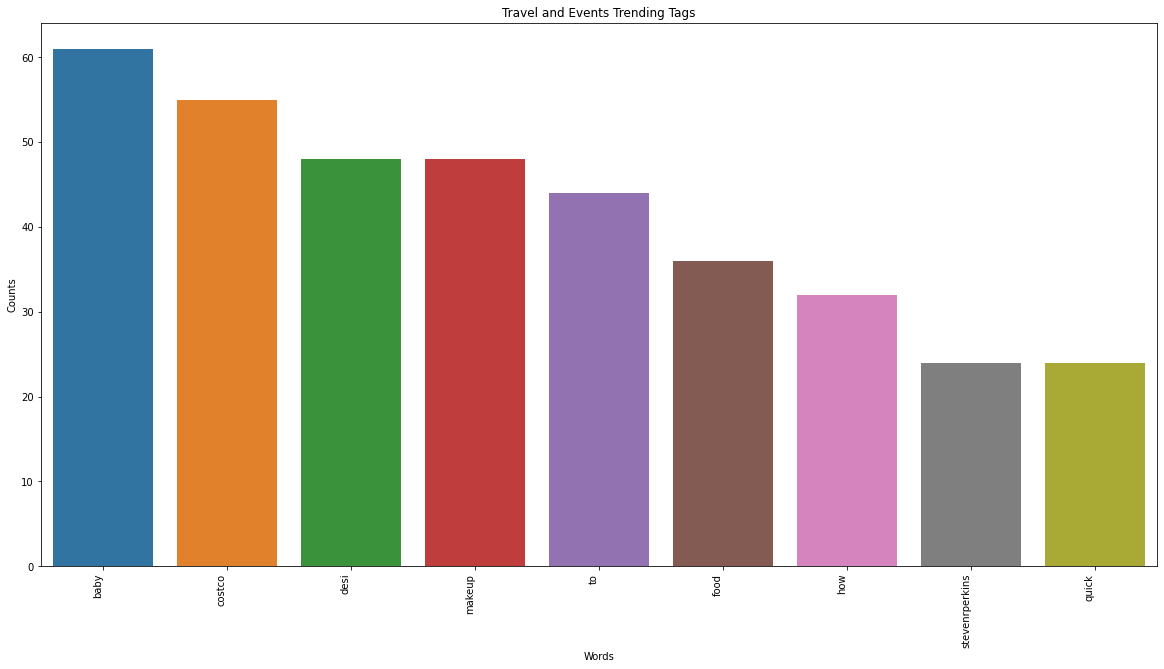

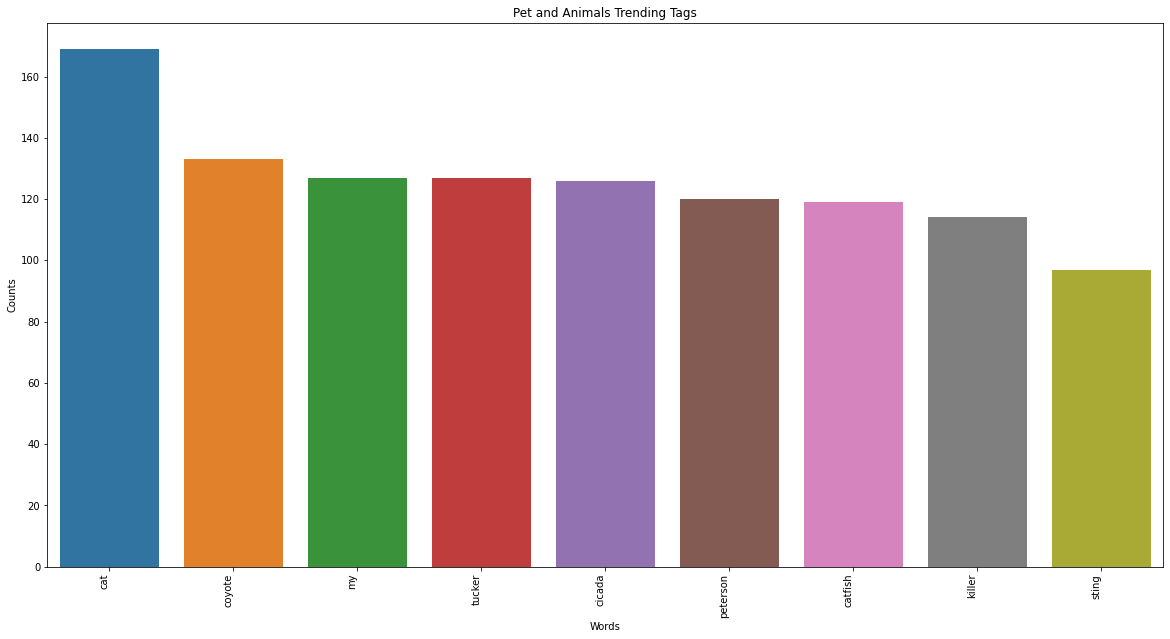

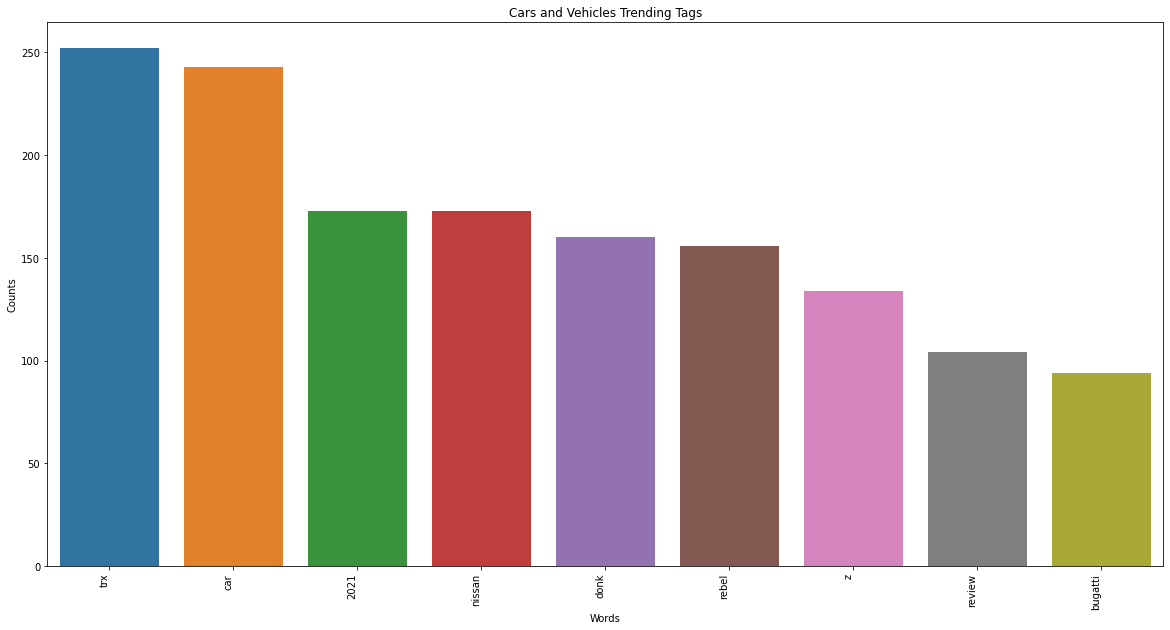

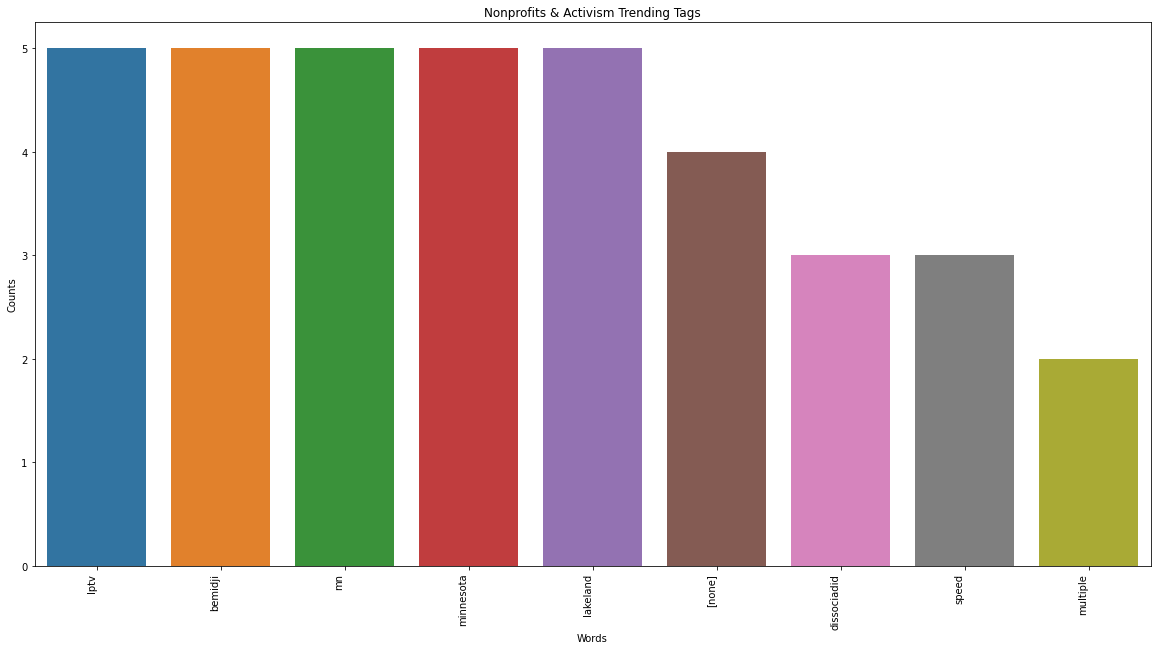

In [18]:
category_data=youtube_data.categoryId.unique()
# list for storing the category
category_count = []
# list for storing three most used tags
tags_used =[]
# new column for storing three most used tags
youtube_data['Top Tags'] = ''
# assigning three most tags in top tags column for each row with respect to the category
for j in category_data:
    j_bar=youtube_data.groupby(['categoryId']).get_group(j)
    cat_display=j_bar['category_name'].unique()[0]
    category_count.append(j_bar.channelId.unique()[0])
    import warnings
    warnings.filterwarnings("ignore")
    j_bar["temp"] = j_bar["temp"].str.lower()
    j_bar=j_bar.temp.str.split(expand=True).stack().value_counts().to_frame()
    j_bar=j_bar.reset_index()
    j_bar.drop(j_bar.index[0])
    j_bar=j_bar.reset_index()
    j_bar.drop(['level_0'], inplace=True, axis=1)
    j_bar.rename(columns={0: "Counts", "index": "Words"}, inplace=True)
    plot=j_bar
    words_array=str(j_bar.Words.iloc[:3].values)[1:-1] 
    words_array=words_array.replace("'","")
    tags_used.append(words_array)
    j_bar = pd.DataFrame(list(zip(category_count, tags_used)), columns=['Player', 'Lines'])
    youtube_data.loc[(youtube_data['categoryId'] == j), ['Top Tags']] = words_array
    plt.figure(figsize=(20,10))
    g = sns.barplot(x="Words", y="Counts", data=plot[1:10])
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right");
    g.set_title(str(cat_display)+' Trending Tags');
youtube_data.head()

__Dropping columns play and playerline to free memory__

In [19]:
del youtube_data['temp']
youtube_data.head()

,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,category_name,Top Tags
0,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People and Blogs,"""damelio"" and the"
1,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming,among us game
2,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment,the and trailer
3,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music,music video the
4,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,How to and Style,to makeup how


__Tag count for each video__

In [20]:
youtube_data['tag_count']=youtube_data['tags'].str.count('\|')
youtube_data.head()

,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,category_name,Top Tags,tag_count
0,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People and Blogs,"""damelio"" and the",14
1,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming,among us game,24
2,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment,the and trailer,29
3,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music,music video the,22
4,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,How to and Style,to makeup how,32


__Percentage of comment, like and dislike__

In [21]:
youtube_data['percent_like']=round((youtube_data['likes']/youtube_data['view_count'])*100)
youtube_data['percent_dislike']=round((youtube_data['dislikes']/youtube_data['view_count'])*100)
youtube_data['percent_comment']=round((youtube_data['comment_count']/youtube_data['view_count'])*100)

__Distribution plot for percentage likes__

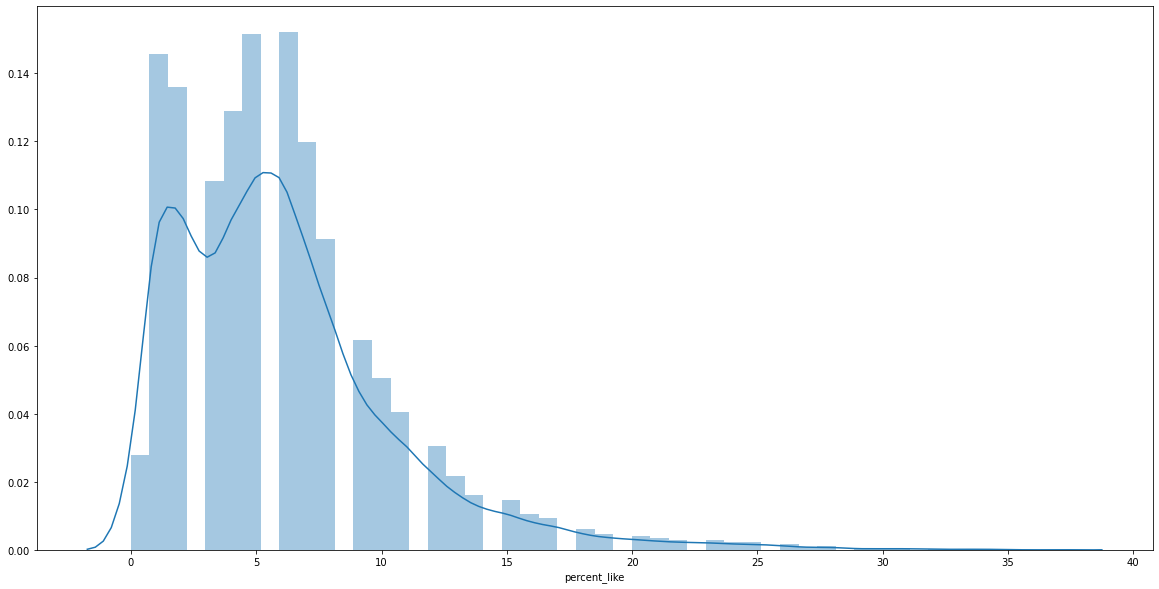

In [22]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['percent_like']) ;

__Distribution plot for percentage dislikes__

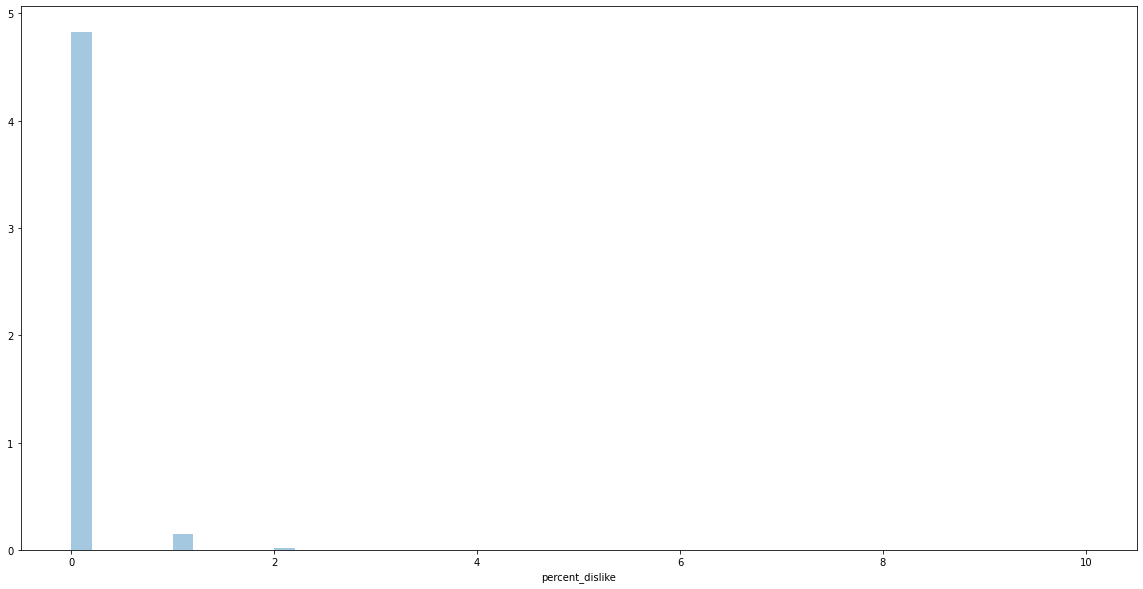

In [23]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['percent_dislike']) ;

__Distribution plot for percent comment__

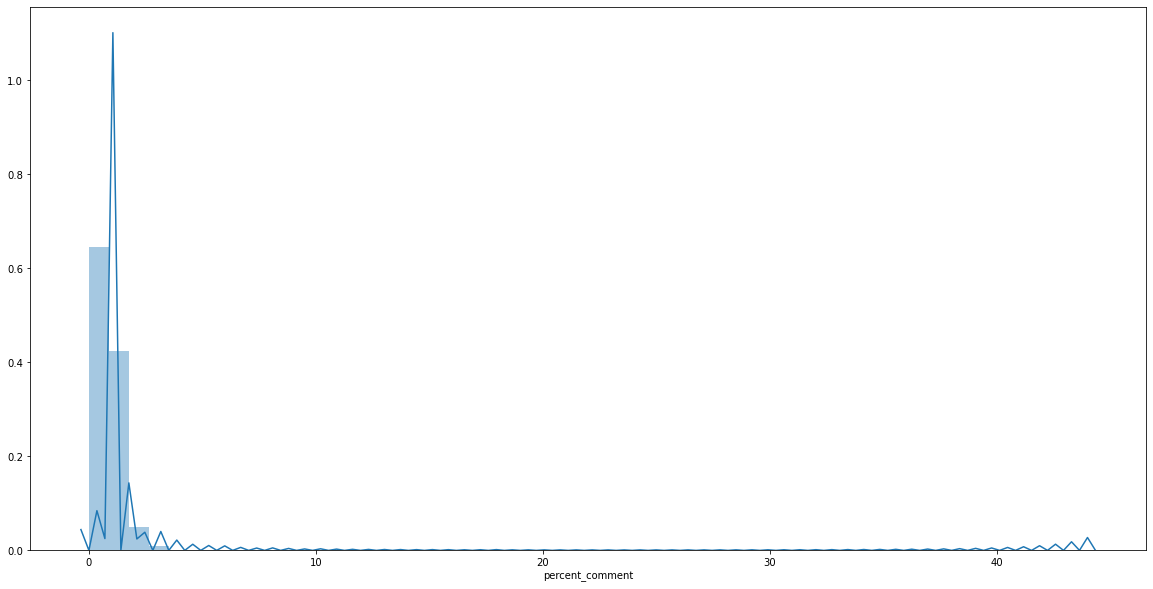

In [24]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['percent_comment']) ;

__Distribution plot for tag count__

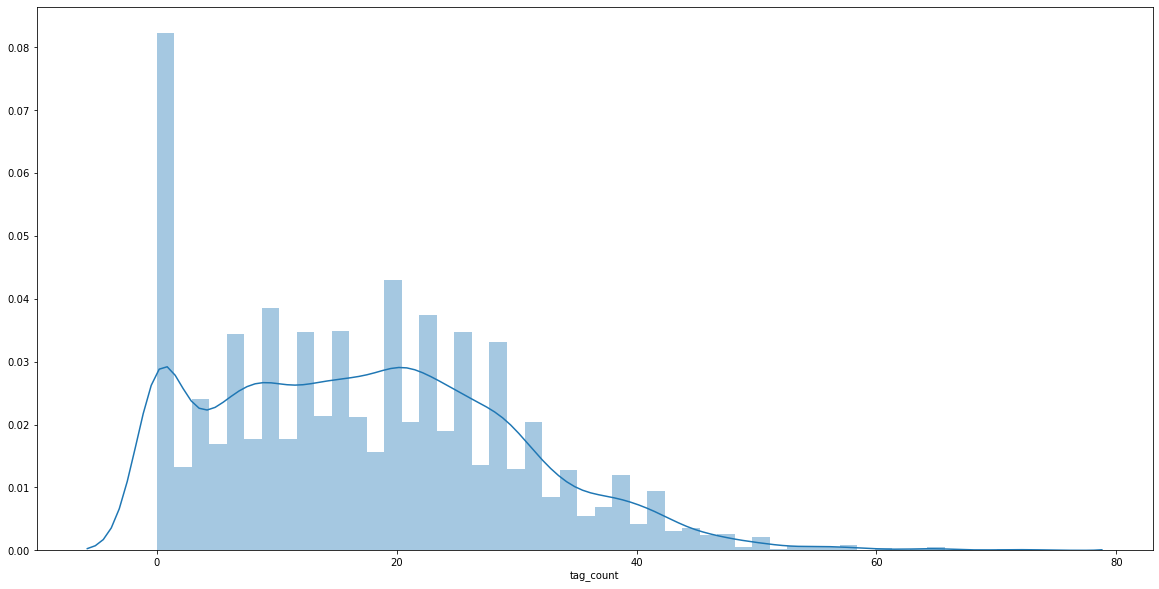

In [25]:
plt.figure(figsize=(20,10))
sns.distplot(youtube_data['tag_count']) ;

__5.5 CLUSTERING__

__5.5.1 To cluster trending videos based on category id, percent like, percent dislike, percent comment using kmeans clustering.__

__Finding k from elbow method__

In [26]:
youtube_datas=youtube_data[['categoryId','percent_like','percent_dislike','percent_comment']]

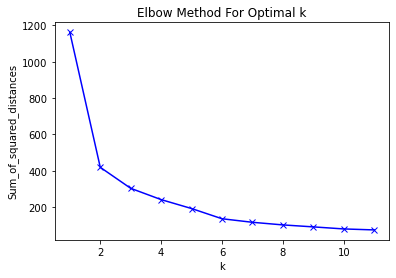

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = youtube_datas[['categoryId','percent_like','percent_dislike','percent_comment']].values
X = np.nan_to_num(X)
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
Sum_of_squared_distances = []
K = range(1,12)
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
for k in K:
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The k=4 is the optimal value of k for clustering the category id, percent like, percent dislike and percent comment.

__Finding k using silhoutte coefficients__

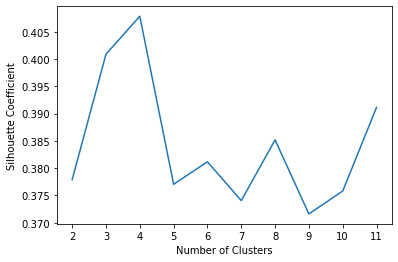

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
X = youtube_datas[['categoryId','percent_like','percent_dislike','percent_comment']].values
X = np.nan_to_num(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
silhouette_coefficients = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

The silhoutte coefficient is high at k=4 so it was chosen.

__Clustered dataset__

In [29]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.5001198 ,  0.87521611, -0.14768007,  1.59252519],
       [ 0.22233554, -0.01345906, -0.14768007,  0.5099513 ],
       [ 0.77790407,  2.43039765, -0.14768007,  1.59252519],
       ...,
       [-1.16658578, -0.90213422, -0.14768007, -0.5726226 ],
       [ 0.77790407, -0.23562785, -0.14768007, -0.5726226 ],
       [ 1.05568833, -0.23562785, -0.14768007,  0.5099513 ]])

__Applying kmeans on the data__

In [30]:
clusterNum =4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 ... 1 0 0]


__Clustered dataset__

In [31]:
youtube_datas["Clus_km"] = labels
youtube_datas.head(5)

,categoryId,percent_like,percent_dislike,percent_comment,Clus_km
0,22,10.0,0.0,2.0,0
1,20,6.0,0.0,1.0,2
2,24,17.0,0.0,2.0,0
3,10,5.0,0.0,2.0,1
4,26,4.0,0.0,0.0,0


In [32]:
k_data=youtube_datas.Clus_km.unique()
for i in k_data:
    i_clus=youtube_datas.groupby(['Clus_km']).get_group(i)
    print("Details for cluster ", i)
    print(i_clus.describe())

Details for cluster  0
        categoryId  percent_like  percent_dislike  percent_comment  Clus_km
count  7032.000000   7032.000000      7032.000000      7032.000000   7032.0
mean     24.203072      6.028299         0.051195         0.542520      0.0
std       1.976250      3.546416         0.270266         0.710697      0.0
min      19.000000      0.000000         0.000000         0.000000      0.0
25%      23.000000      3.000000         0.000000         0.000000      0.0
50%      24.000000      6.000000         0.000000         0.000000      0.0
75%      25.000000      8.000000         0.000000         1.000000      0.0
max      29.000000     21.000000         5.000000        11.000000      0.0
Details for cluster  2
        categoryId  percent_like  percent_dislike  percent_comment  Clus_km
count  2893.000000   2893.000000      2893.000000      2893.000000   2893.0
mean     18.070861      2.876944         0.052195         0.298998      2.0
std       1.685763      2.043289         0

__Grouping by means__

In [33]:
youtube_datas.groupby('Clus_km').mean()

,categoryId,percent_like,percent_dislike,percent_comment
Clus_km,,,,
0,24.203072,6.028299,0.051195,0.542520
1,8.116105,6.154999,0.024777,0.475655
2,18.070861,2.876944,0.052195,0.298998
3,12.717984,18.471390,0.051771,1.557221


__Clustered category ID and percentage like__

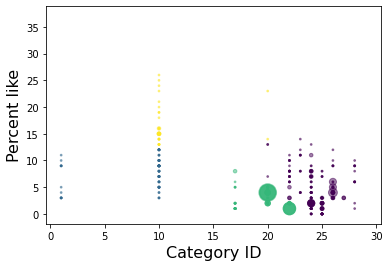

In [34]:
area = np.pi * (X[:, 2])**2  
plt.scatter(X[:, 0], X[:, 1], s=area,c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Category ID', fontsize=16)
plt.ylabel('Percent like', fontsize=16)
plt.show()

In 2D,
1. Violet: Cluster 0
   Category ID: 1 to 10
   Percentage Like: 0 to 15%
   Percentage Dislike: 0 to 1%
   Percentage Comment: 0 to 24%
2. Green: Cluster 2
   Category ID: 1 to 29
   Percentage Like: 11 to 37%
   Percentage Dislike: 0 to 2%
   Percentage Comment: 0 to 44%
3. Yellow: Cluster 3
   Category ID: 15 to 22
   Percentage Like: 0 to 11%
   Percentage Dislike: 0 to 10%
   Percentage Comment: 0 to 10%
4. Blue: Cluster 1
   Category ID: 19 to 29
   Percentage Like: 0 to 21%
   Percentage Dislike: 0 to 5%
   Percentage Comment: 0 to 11%

__Clustering based on percentage like, percentage dislike and category ID__

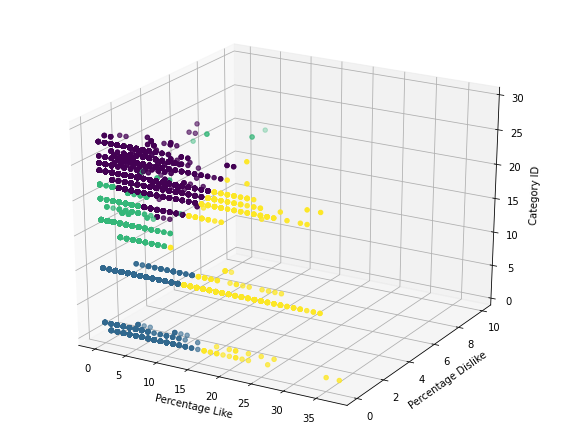

In [35]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25)

plt.cla()

ax.set_xlabel('Percentage Like')
ax.set_ylabel('Percentage Dislike')
ax.set_zlabel('Category ID')

ax.scatter(X[:, 1], X[:, 2],X[:, 0], c= labels.astype(np.float));

In 3D with 4D being label colors,
1. Violet: Cluster 0
   Category ID: 1 to 10
   Percentage Like: 0 to 15%
   Percentage Dislike: 0 to 1%
   Percentage Comment: 0 to 24%
2. Green: Cluster 2
   Category ID: 1 to 29
   Percentage Like: 11 to 37%
   Percentage Dislike: 0 to 2%
   Percentage Comment: 0 to 44%
3. Yellow: Cluster 3
   Category ID: 15 to 22
   Percentage Like: 0 to 11%
   Percentage Dislike: 0 to 10%
   Percentage Comment: 0 to 10%
4. Blue: Cluster 1
   Category ID: 19 to 29
   Percentage Like: 0 to 21%
   Percentage Dislike: 0 to 5%
   Percentage Comment: 0 to 11%

__Clustering based on percentage comment, percentage like and category ID__

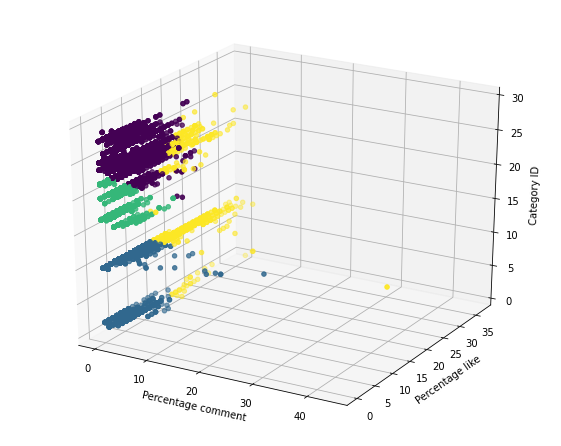

In [36]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25)

plt.cla()
 
ax.set_xlabel('Percentage comment')
ax.set_ylabel('Percentage like')
ax.set_zlabel('Category ID')

ax.scatter(X[:, 3], X[:, 1],X[:, 0], c= labels.astype(np.float));

In 3D with 4D being label colors,
1. Violet: Cluster 0
   Category ID: 1 to 10
   Percentage Like: 0 to 15%
   Percentage Dislike: 0 to 1%
   Percentage Comment: 0 to 24%
2. Green: Cluster 2
   Category ID: 1 to 29
   Percentage Like: 11 to 37%
   Percentage Dislike: 0 to 2%
   Percentage Comment: 0 to 44%
3. Yellow: Cluster 3
   Category ID: 15 to 22
   Percentage Like: 0 to 11%
   Percentage Dislike: 0 to 10%
   Percentage Comment: 0 to 10%
4. Blue: Cluster 1
   Category ID: 19 to 29
   Percentage Like: 0 to 21%
   Percentage Dislike: 0 to 5%
   Percentage Comment: 0 to 11%

__5.5.2 To cluster trending videos based on tag count, percent like, percent dislike, percent comment using dbscan.__

__Finding distances using nearest neighbors__

In [37]:
youtube_datad=youtube_data[['tag_count','percent_like','percent_dislike','percent_comment']]

In [38]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
X = youtube_datad[['tag_count','percent_like','percent_dislike','percent_comment']].values
X = np.nan_to_num(X)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

__Finding epsilon using distances plot__

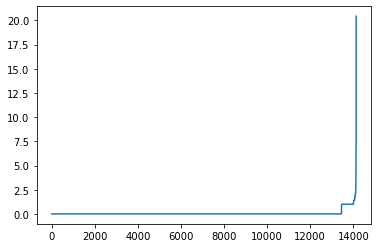

In [39]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

__Fitting epsilon__

In [40]:
m = DBSCAN(eps=1, min_samples=50)
m.fit(X);
clusters = m.labels_
print(clusters)

[ 0  0 -1 ...  0  0  0]


In [41]:
youtube_datad["Clus_d"] = labels
youtube_datad.head(5)

,tag_count,percent_like,percent_dislike,percent_comment,Clus_d
0,14,10.0,0.0,2.0,0
1,24,6.0,0.0,1.0,2
2,29,17.0,0.0,2.0,0
3,22,5.0,0.0,2.0,1
4,32,4.0,0.0,0.0,0


In [42]:
d_data=youtube_datad.Clus_d.unique()
for i in d_data:
    i_clus=youtube_datad.groupby(['Clus_d']).get_group(i)
    print("Details for cluster ", i)
    print(i_clus.describe())

Details for cluster  0
         tag_count  percent_like  percent_dislike  percent_comment  Clus_d
count  7032.000000   7032.000000      7032.000000      7032.000000  7032.0
mean     16.430034      6.028299         0.051195         0.542520     0.0
std      11.910296      3.546416         0.270266         0.710697     0.0
min       0.000000      0.000000         0.000000         0.000000     0.0
25%       7.000000      3.000000         0.000000         0.000000     0.0
50%      15.000000      6.000000         0.000000         0.000000     0.0
75%      25.000000      8.000000         0.000000         1.000000     0.0
max      60.000000     21.000000         5.000000        11.000000     0.0
Details for cluster  2
         tag_count  percent_like  percent_dislike  percent_comment  Clus_d
count  2893.000000   2893.000000      2893.000000      2893.000000  2893.0
mean     19.535430      2.876944         0.052195         0.298998     2.0
std      12.133872      2.043289         0.478847     

__Mapping colors with clusters__

In [43]:
colors = ['blue', 'yellow', 'red', 'green', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'];
vectorizer = np.vectorize(lambda x: colors[x % len(colors)]);

__Scatter plot for percent likes vs tag counts__

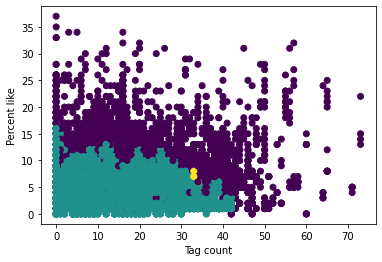

In [44]:
plt.scatter(X[:,0], X[:,1], c= clusters.astype(np.float));
plt.xlabel('Tag count')
plt.ylabel('Percent like')
plt.show()

In 2D,
1. Cluster 1 Blue
   Tag count: 0 to 60
   Percent like: 0 to 21
   Percent dislike: 0 to 5
   Percent comment: 0 to 11
2. Cluster 3 Yellow
   Tag count: 0 to 64
   Percent like: 1 to 11
   Percent dislike: 0 to 10
   Percent comment: 0 to 10
3. Cluster 0 Green Color
   Tag count: 0 to 71
   Percent like: 1 to 15
   Percent dislike: 0 to 1
   Percent comment: 0 to 24
4. Cluster 2 Violet
   Tag count: 0 to 73
   Percent like: 11 to 37
   Percent dislike: 0 to 2
   Percent comment: 0 to 44

__Clusters for percent comment, percent like and tag count__

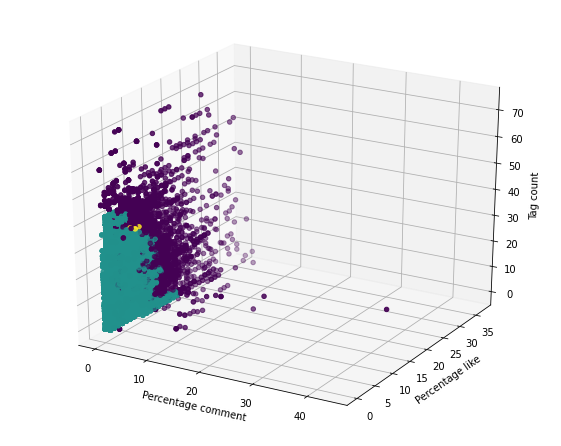

In [45]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25)

plt.cla()
 
ax.set_xlabel('Percentage comment')
ax.set_ylabel('Percentage like')
ax.set_zlabel('Tag count')

ax.scatter(X[:, 3], X[:, 1],X[:, 0], c= clusters.astype(np.float));
#vectorizer(clusters))#

In 4D with 4D being the clusters,
1. Cluster 1 Blue
   Tag count: 0 to 60
   Percent like: 0 to 21
   Percent dislike: 0 to 5
   Percent comment: 0 to 11
2. Cluster 3 Yellow
   Tag count: 0 to 64
   Percent like: 1 to 11
   Percent dislike: 0 to 10
   Percent comment: 0 to 10
3. Cluster 0 Green Color
   Tag count: 0 to 71
   Percent like: 1 to 15
   Percent dislike: 0 to 1
   Percent comment: 0 to 24
4. Cluster 2 Violet
   Tag count: 0 to 73
   Percent like: 11 to 37
   Percent dislike: 0 to 2
   Percent comment: 0 to 44

__Clusters for percent dislike, percent like and tag count__

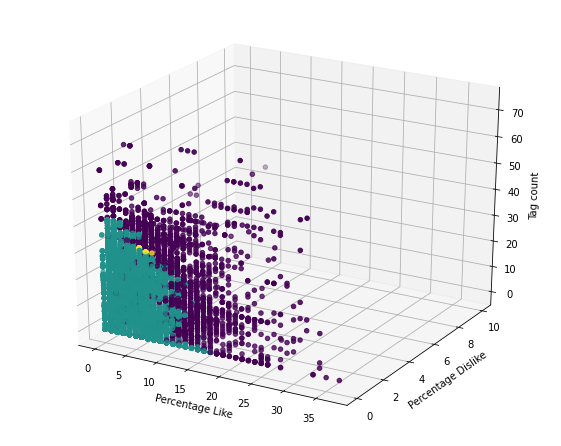

In [46]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25)

plt.cla()

ax.set_xlabel('Percentage Like')
ax.set_ylabel('Percentage Dislike')
ax.set_zlabel('Tag count')

ax.scatter(X[:, 1], X[:, 2],X[:, 0], c= clusters.astype(np.float));

In 4D with 4D being colors,
1. Cluster 1 Blue
   Tag count: 0 to 60
   Percent like: 0 to 21
   Percent dislike: 0 to 5
   Percent comment: 0 to 11
2. Cluster 3 Yellow
   Tag count: 0 to 64
   Percent like: 1 to 11
   Percent dislike: 0 to 10
   Percent comment: 0 to 10
3. Cluster 0 Green Color
   Tag count: 0 to 71
   Percent like: 1 to 15
   Percent dislike: 0 to 1
   Percent comment: 0 to 24
4. Cluster 2 Violet
   Tag count: 0 to 73
   Percent like: 11 to 37
   Percent dislike: 0 to 2
   Percent comment: 0 to 44

__6. Results__

Using dbscan and kmeans clustering, the dependency of likes, dislikes and comment percentages on the category and tag count was analyzed.